In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
X = np.array([x+1 for x in range(105)])
print(X)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]


In [0]:
X = X.reshape(35,3,1)
print(X)

[[[  1]
  [  2]
  [  3]]

 [[  4]
  [  5]
  [  6]]

 [[  7]
  [  8]
  [  9]]

 [[ 10]
  [ 11]
  [ 12]]

 [[ 13]
  [ 14]
  [ 15]]

 [[ 16]
  [ 17]
  [ 18]]

 [[ 19]
  [ 20]
  [ 21]]

 [[ 22]
  [ 23]
  [ 24]]

 [[ 25]
  [ 26]
  [ 27]]

 [[ 28]
  [ 29]
  [ 30]]

 [[ 31]
  [ 32]
  [ 33]]

 [[ 34]
  [ 35]
  [ 36]]

 [[ 37]
  [ 38]
  [ 39]]

 [[ 40]
  [ 41]
  [ 42]]

 [[ 43]
  [ 44]
  [ 45]]

 [[ 46]
  [ 47]
  [ 48]]

 [[ 49]
  [ 50]
  [ 51]]

 [[ 52]
  [ 53]
  [ 54]]

 [[ 55]
  [ 56]
  [ 57]]

 [[ 58]
  [ 59]
  [ 60]]

 [[ 61]
  [ 62]
  [ 63]]

 [[ 64]
  [ 65]
  [ 66]]

 [[ 67]
  [ 68]
  [ 69]]

 [[ 70]
  [ 71]
  [ 72]]

 [[ 73]
  [ 74]
  [ 75]]

 [[ 76]
  [ 77]
  [ 78]]

 [[ 79]
  [ 80]
  [ 81]]

 [[ 82]
  [ 83]
  [ 84]]

 [[ 85]
  [ 86]
  [ 87]]

 [[ 88]
  [ 89]
  [ 90]]

 [[ 91]
  [ 92]
  [ 93]]

 [[ 94]
  [ 95]
  [ 96]]

 [[ 97]
  [ 98]
  [ 99]]

 [[100]
  [101]
  [102]]

 [[103]
  [104]
  [105]]]


In [0]:
Y = list()
for x in X:
    Y.append(x.sum())

Y = np.array(Y)
print(Y)

[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132 141 150 159
 168 177 186 195 204 213 222 231 240 249 258 267 276 285 294 303 312]


In [0]:
data = np.array(X,dtype=float)
target = np.array(Y,dtype=float)
data.shape
#target.shape

(35, 3, 1)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.4,random_state=4)

In [0]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [0]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 21 samples, validate on 14 samples
Epoch 1/2000





21/21 [==============================] - 3s 153ms/step - loss: 31093.3965 - val_loss: 37232.7305
Epoch 2/2000
21/21 [==============================] - 0s 2ms/step - loss: 31090.0684 - val_loss: 37228.6484
Epoch 3/2000
21/21 [==============================] - 0s 2ms/step - loss: 31086.0957 - val_loss: 37225.1211
Epoch 4/2000
21/21 [==============================] - 0s 1ms/step - loss: 31083.1699 - val_loss: 37222.5547
Epoch 5/2000
21/21 [==============================] - 0s 1ms/step - loss: 31080.8008 - val_loss: 37219.5039
Epoch 6/2000
21/21 [==============================] - 0s 1ms/step - loss: 31078.0000 - val_loss: 37215.8320
Epoch 7/2000
21/21 [==============================] - 0s 2ms/step - loss: 31074.6250 - val_loss: 37211.8633
Epoch 8/2000
21/21 [==============================] - 0s 1ms/step - loss: 31071.0391 - val_loss:

In [0]:
results = model.predict(x_test)

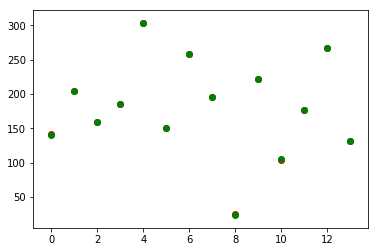

In [0]:
plt.scatter(range(14),results,c='r')
plt.scatter(range(14),y_test,c='g')
plt.show()